In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D

In [6]:
from tensorflow.keras import datasets

In [7]:
(x_train, y_train), (x_test,y_test) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [10]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


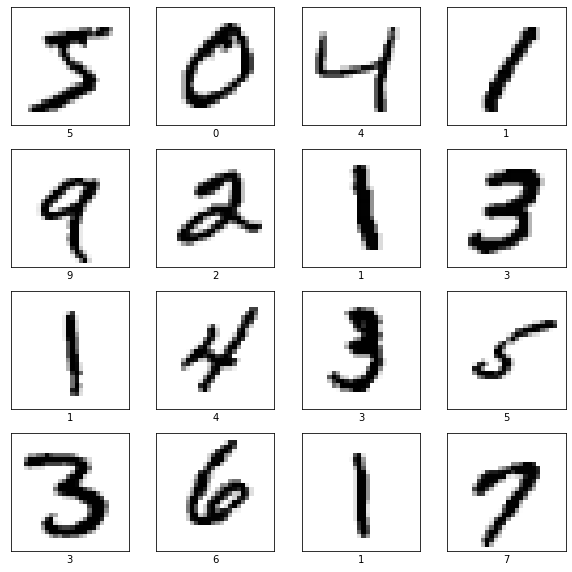

In [13]:
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(y_train[i])

plt.show()

In [14]:
# Pre-processing
x_train = x_train/255 #Normalising so that all values are in the range of 0-1
x_test = x_test/255

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train = x_train[:10000,:,:]# Shortening the dataset
x_test = x_test[:3000,:,:]
y_train = y_train[:10000]
y_test = y_test[:3000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 28, 28)
(3000, 28, 28)
(10000,)
(3000,)


In [21]:
#Reshaping the training and test data
x_train = x_train.reshape(10000,28,28,1)
x_test = x_test.reshape(3000,28,28,1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(3000, 28, 28, 1)
(10000,)
(3000,)


In [28]:
#Building the CNN model
m1 = Sequential()
m1.add(Conv2D(64,(3,3),strides=1,activation='relu',input_shape=(28,28,1))) #Strides is the number pixels shifted to the right or left
m1.add(MaxPooling2D(pool_size=(2,2),strides=1))
m1.add(Conv2D(64,(3,3),strides=1,activation='relu',input_shape=(28,28,1))) 
m1.add(MaxPooling2D(pool_size=(2,2),strides=1))
m1.add(Flatten()) #Flattening the previous layers into 1 single layer
m1.add(Dense(128,activation='relu'))
m1.add(Dense(10,activation='softmax')) # softmax since multiclass classification is being done

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [30]:
h1 = m1.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
313/313 [==============================] - 63s 200ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.1060 - val_accuracy: 0.9737
Epoch 2/5
313/313 [==============================] - 77s 246ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.1258 - val_accuracy: 0.9650
Epoch 3/5
313/313 [==============================] - 96s 306ms/step - loss: 0.0173 - accuracy: 0.9940 - val_loss: 0.1118 - val_accuracy: 0.9703
Epoch 4/5
313/313 [==============================] - 82s 263ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.1034 - val_accuracy: 0.9753
Epoch 5/5
313/313 [==============================] - 75s 239ms/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 0.1371 - val_accuracy: 0.9703


In [31]:
r1= pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
0,0.035638,0.9890,0.105981,0.973667,0
1,0.024393,0.9920,0.125825,0.965000,1
2,0.017343,0.9940,0.111751,0.970333,2
3,0.018290,0.9944,0.103359,0.975333,3
4,0.008982,0.9967,0.137148,0.970333,4


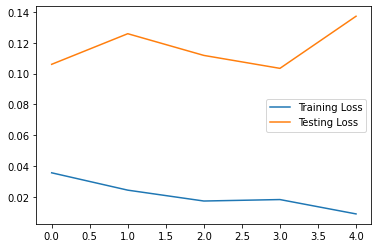

In [32]:
plt.plot(r1['Epochs'],r1['loss'],label='Training Loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

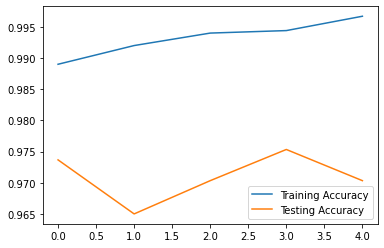

In [33]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training Accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing Accuracy')
plt.legend()
plt.show()

In [34]:
y_pred = m1.predict(x_test)
print(y_pred)

[[2.80504003e-15 1.04247554e-17 3.59110224e-12 ... 1.00000000e+00
  5.30776213e-15 2.22875520e-11]
 [2.49032045e-10 1.08022161e-10 1.00000000e+00 ... 6.38891948e-14
  1.37765801e-15 7.44915681e-18]
 [1.76535366e-07 9.98713255e-01 1.23179681e-03 ... 4.58380391e-08
  8.46109560e-06 7.98503486e-09]
 ...
 [5.67270781e-08 9.99998689e-01 8.17375280e-07 ... 1.28076366e-07
  1.03043249e-07 3.58582106e-08]
 [1.30003439e-10 3.16338003e-07 3.83812448e-06 ... 2.22537722e-08
  7.35185386e-05 1.24110645e-02]
 [1.00000000e+00 4.09683713e-19 5.56069253e-12 ... 2.32321774e-14
  1.49322155e-08 5.06070119e-09]]


In [35]:
y_pred1 = [np.argmax(i) for i in y_pred]
print(y_pred1)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 8, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[266   0   2   0   0   0   3   0   0   0]
 [  0 335   1   3   0   0   0   0   1   0]
 [  1   0 305   2   2   0   0   1   1   1]
 [  0   0   1 308   0   4   1   1   1   0]
 [  0   0   1   0 303   0   3   0   2   9]
 [  0   0   0   4   0 279   0   0   0   0]
 [  1   2   0   0   1   2 265   0   1   0]
 [  0   1   6   7   1   0   0 284   2   5]
 [  3   0   0   1   0   1   0   1 280   0]
 [  1   1   0   0   0   1   0   0   6 286]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       271
           1       0.99      0.99      0.99       340
           2       0.97      0.97      0.97       313
           3       0.95      0.97      0.96       316
           4       0.99      0.95      0.97       318
           5       0.97      0.99      0.98       283
           6       0.97      0.97      0.97       272
           7       0.99      0.93      0.96       306
           8       0.95      0.98      0.97       286
           9       0.95     